## Chapter 1: Introduction to Reinforcement Learning

### 1. What is Reinforcement learning (RL)?

An area of machine learning that aims to learn what to do to: so as to maximize a numerical reward signal! </br>
It is currently used in many fields, such as game, robotic control, stock trading, etc...

---

### 2. Agents and Environments


<p align="center">

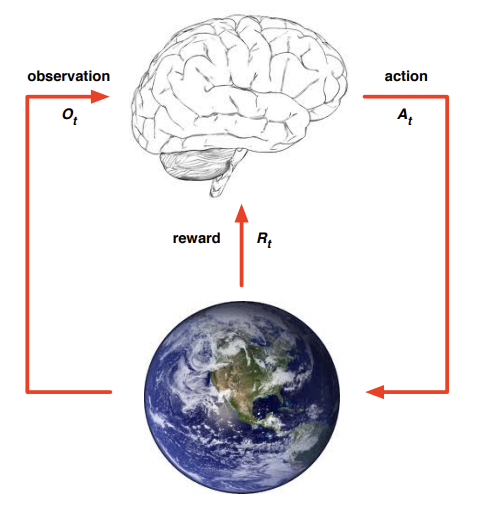
</p>

At each timestep $t$ 
*  **Agents**: Receives Reward $R_t$ and Observation $O_t$, executes Action $A_t$
* **Environments**: Receives Action $A_t$, then emits Reward $R_{t+1}$ and Next Observation $O_{t+1}$ 

The sequence of observations, actions, rewards are called history.</br>

$$\begin{align}
H_t = O_1, R_1, A_1, ... , A_{t-1}, O_t, R_t
\end{align}$$
</br>
</br>
**State**$(S_t)$: information used to determine what happens next. Both agent and environment have state, and it may not agree with each other

* **Fully observable environments**: $O_t = S_t$. Agent can know exact state of the environment. It is called **markov decision process (MDP)**
* **Partially observable environments**: $O_t \neq S_t$. Agent only know partial state of the environment. It is called **partially observable markov decision process (POMDP)**


Real world problems are more likely to be POMDP, but for easier understanding of RL, we will use MDP that [OpenAI Gym](https://gymnasium.farama.org/) provides.

OpenAI Gym is one of the most popular simulated environments for RL. It provides diverse environments, from Atari 2600 games to Humanoid, that can interact with your RL agent. But for now we will use a simple toy text environment, **FrozenLake-v1**.

In [1]:
import gymnasium as gym
import matplotlib
from utils import JupyterRender

%matplotlib inline

print(f"Gym verison: {gym.__version__}")
print(f"Matplotlib version: {matplotlib.__version__}")


Gym verison: 0.26.3
Matplotlib version: 3.6.3


 **[FrozenLake-v1](https://gymnasium.farama.org/environments/toy_text/frozen_lake/)** is an environment that involves crossing a frozen lake from start to goal without falling into any holes by walking over the frozen lake.</br></br>
 
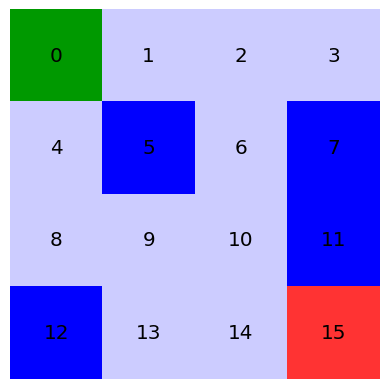

There are four different states in the environment:
* **S: Starting point**
* **F: Frozen land. The agent can walk on it.**
* **H: Hole. The episode is done if the agent falls into it.**
* **G: Goal. Final point. The agent can get reward (+1) if it reaches here.**

Each state is represented as current_row * 4 + current_column.

And the agent can move in four directions: 
* **0: Move left**
* **1: Move down**
* **2: Move right**
* **3: Move up**


and only can get reward (+1) at the goal (gift box). </br> 
You can try it by yourself!

State: 15, Reward: 1.0, Done: True


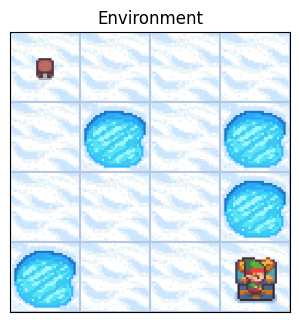

In [2]:
#define the environment.
env = gym.make("FrozenLake-v1", render_mode='rgb_array', is_slippery=False)

#FrozenLake can be 8x8.
#env = gym.make("FrozenLake-v1", map_name='8x8', render_mode='rgb_array', is_slippery=False)

#Or you can design the env as you want.
#env = gym.make("FrozenLake-v1", desc=["SFFH","FFFG"], render_mode='rgb_array', is_slippery=False)

env = JupyterRender(env)
state, _ = env.reset()#reset the environment
print("State: ", state)
env.render()

done = False
while not done:
    next_state, reward, done, _, _ = env.step(int(input()))## executes an action, and receive the next state, reward, done signal
    print(f"State: {next_state}, Reward: {reward}, Done: {done}")
    env.render()
